In [17]:
%load_ext rpy2.ipython

c:\users\gusta\appdata\local\programs\python\python38\lib\site-packages\rpy2\robjects\packages.py:365: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [69]:
%%R
library(tidyr)
library(dplyr)

entrada <- read.csv("dados\\clusters.csv")
entrada <- as_tibble(entrada)

processada <- entrada %>%
                  pivot_longer(
                       cols = -EJs,
                       names_to = c("Eixo", "Cluster", "Dores"),
                       names_pattern = "([A-Z]+)_([1-5])_([1-5])",
                       values_to = "Resposta")

empresas_juniores <- processada %>%
                         group_by(EJs, Cluster, Eixo) %>%
                         summarise(media=mean(Resposta))
        
ejs_por_MN <- empresas_juniores %>% filter(Eixo == "MT")
ejs_por_VM <- empresas_juniores %>% filter(Eixo == "VM")
ejs_por_TC <- empresas_juniores %>% filter(Eixo == "TC")
ejs_por_GO <- empresas_juniores %>% filter(Eixo == "GO")

ejs_por_cluster <- empresas_juniores %>%
                       group_by(EJs, Cluster) %>%
                       summarise(media=mean(media))
        
dores <- processada %>%
             group_by(Cluster, Eixo, Dores) %>%
             summarise(media=mean(Resposta)) %>%
             arrange(desc(media))

print(dores, n=45)

`summarise()` regrouping output by 'EJs', 'Cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'Cluster', 'Eixo' (override with `.groups` argument)
# A tibble: 45 x 4
# Groups:   Cluster, Eixo [20]
   Cluster Eixo  Dores media
   <chr>   <chr> <chr> <dbl>
 1 5       VM    2       2.7
 2 2       TC    1       2.6
 3 3       TC    2       2.6
 4 5       VM    1       2.6
 5 1       TC    1       2.4
 6 4       VM    1       2.4
 7 1       VM    2       2.2
 8 4       GO    2       2.1
 9 5       MN    2       2.1
10 2       VM    2       2  
11 3       TC    1       2  
12 3       TC    3       2  
13 4       MN    2       2  
14 4       TC    1       2  
15 4       TC    2       2  
16 3       MN    1       1.9
17 4       VM    2       1.9
18 5       GO    3       1.9
19 5       MN    1       1.9
20 5       TC    2       1.9
21 3       VM    2       1.8
22 2       GO    1       1.7
23 

# Agrupamento de EJs pelo padrão de resposta ao questionário dos clusters

In [1]:
import numpy as np
from numbers import Number
from numpy.linalg import inv as inversa


def normalizar_colunas(A):
    colunas 

class Sinal_de_Cluster:
    
    bases = {"c": ((1, 0, 0, 0, 0),
                   (0, 1, 0, 0, 0),
                   (0, 0, 1, 0, 0),
                   (0, 0, 0, 1, 0),
                   (0, 0, 0, 0, 1))
             }
    
    @classmethod
    def definir_base(cls, símbolo, matriz, normal=True):
        if not normal:
            cls.bases[símbolo] = matriz
        else:
            vetores_da_base = [[coord[i] for coord in matriz]
                                for i in range(len(matriz[0]))]
            sinais_da_base = [Sinal_de_Cluster(vetor)
                              for vetor in vetores_da_base]
            base_normalizada = [sinal/abs(sinal)
                                for sinal in sinais_da_base]
            cls.bases[símbolo] = [
                
                [base[i] for base in base_normalizada]
                 for i in range(len(base_normalizada[0]))
            ]
    def __init__(self, vetor, base="c"):
        self.base = base
        self.coordenadas = [coord for coord in vetor]
        self.pontos = [0] + self.coordenadas + [0]
        self.T = [[coord] for coord in vetor]
         
    def interno(self, other):
        resultado = 0
        for i in range (7):
            k = 1
            if i == 0 or i == 6: k = 0.5
            resultado += k * self.pontos[i] * other.pontos[i]
        return resultado
    
    def normalizado(self):
        return self/(abs(self))
    
    def __mul__(self, other):
        if isinstance(other, Sinal_de_Cluster):
            return self.interno(other)
        elif isinstance(other, Number):
            return other*self
        else:
            raise NotImplementedError
            
    def __truediv__(self, other):
        if isinstance(other, Number):
            return self * (1/other)
    
    def __rmul__(self, other):
        if isinstance(other, Number):
            vetor = [other * coord for
                     coord in self.coordenadas]
            return Sinal_de_Cluster(vetor, base=self.base)
        else:
            raise NotImplementedError
            
    def __abs__(self):
        return float((self * self) ** (1/2))
    
    def __len__(self):
        return len(self.coordenadas)
    
    def __getitem__(self, i):
        return self.coordenadas[i]
    
    def __add__(self, other):
        vetor = [self.coordenadas[i]
                 + other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __sub__(self, other):
        vetor = [self.coordenadas[i]
                 - other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def para_a_base(self, base):
        if base == self.base:
            return self
        else:
            atual_para_c = Sinal_de_Cluster.bases[self.base]
            c_para_base = inversa(
                np.array(Sinal_de_Cluster.bases[base]))
            array = c_para_base @ atual_para_c @ np.array(self.T)
            return Sinal_de_Cluster([n[0] for n in array],
                                    base=base)
        
    def __repr__(self):
        return np.array(self.T).__repr__(
               ) + "\nbase {}".format(self.base)
    
    def __str__(self):
        return np.array(self.T).__str__(
               ) + "base {}".format(self.base)
    
print("""Definindo uma nova base
----------------------""")

matriz_da_base_C = (
    
    (8, 4, 2, 1, 1),
    (4, 8, 4, 2, 1),
    (2, 4, 8, 4, 2),
    (1, 2, 4, 8, 4),
    (1, 1, 2, 4, 8))

print(
"""
Matriz de vetores
originais da base C:
{}
{}
{}
{}
{}
""".format(*matriz_da_base_C))

Sinal_de_Cluster.definir_base(
         "C", matriz_da_base_C)

Definindo uma nova base
----------------------

Matriz de vetores
originais da base C:
(8, 4, 2, 1, 1)
(4, 8, 4, 2, 1)
(2, 4, 8, 4, 2)
(1, 2, 4, 8, 4)
(1, 1, 2, 4, 8)



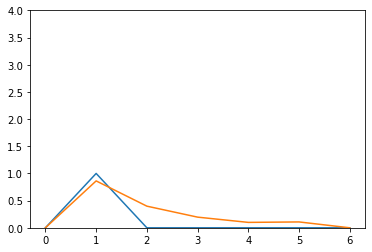

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

axes = plt.gca()
axes.set_ylim([0, 4])

X = [0, 1, 2, 3, 4, 5, 6]

c1 = Sinal_de_Cluster([1, 0, 0, 0, 0])
plt.plot(X, c1.pontos)

C1 = Sinal_de_Cluster(
    Sinal_de_Cluster.bases["C"][0])
plt.plot(X, C1.pontos)

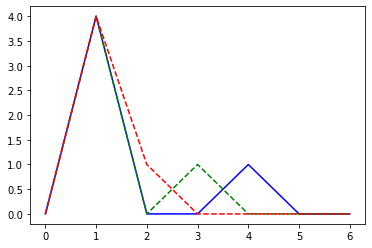

In [3]:
b = base_de_entrada = "C"

EJ_1 = Sinal_de_Cluster([4, 0, 0, 1, 0], b)
plt.plot(X, EJ_1.pontos, 'b-')

EJ_2 = Sinal_de_Cluster([4, 0, 1, 0, 0], b)
plt.plot(X, EJ_2.pontos, 'g--')

EJ_3 = Sinal_de_Cluster([4, 1, 0, 0, 0], b)
plt.plot(X, EJ_3.pontos, 'r--')

In [4]:
def distância(S1, S2):
    return abs(S1 - S2)

def ângulo(S1, S2):
    return (S1 * S2)/(abs(S1) * abs(S2))

print("""
Distância EJ1-EJ2: {:.3f}
Ângulo:            {:.3f}""".format(
    distância(EJ_1, EJ_2),
    ângulo(EJ_1, EJ_2)))

print("""
Distância EJ1-EJ3: {:.3f}
Ângulo:            {:.3f}""".format(
    distância(EJ_1, EJ_3),
    ângulo(EJ_1, EJ_3)))


Distância EJ1-EJ2: 1.414
Ângulo:            0.941

Distância EJ1-EJ3: 1.414
Ângulo:            0.941


In [5]:
print("""
Repetindo o cálculo em c
--------------------------""")

EJ_1 = EJ_1.para_a_base("c")

EJ_2 = EJ_2.para_a_base("c")

EJ_3 = EJ_3.para_a_base("c")

print("""
Distância EJ1-EJ2: {:.3f}
Ângulo:            {:.3f}""".format(
    distância(EJ_1, EJ_2),
    ângulo(EJ_1, EJ_2)))

print("""
Distância EJ1-EJ3: {:.3f}
Ângulo:            {:.3f}""".format(
    distância(EJ_1, EJ_3),
    ângulo(EJ_1, EJ_3)))


Repetindo o cálculo em c
--------------------------

Distância EJ1-EJ2: 0.632
Ângulo:            0.991

Distância EJ1-EJ3: 0.944
Ângulo:            0.982


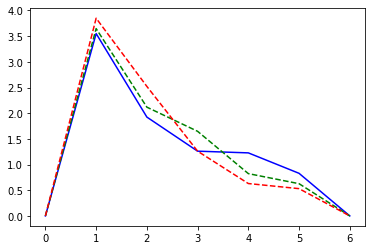

In [6]:
plt.plot(X, EJ_1.pontos, 'b-')
plt.plot(X, EJ_2.pontos, 'g--')
plt.plot(X, EJ_3.pontos, 'r--')

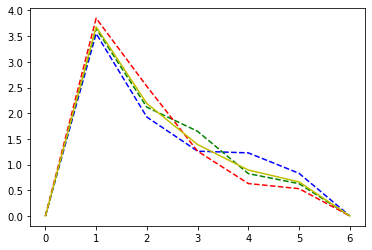

In [7]:
EJ_média = (EJ_1 + EJ_2 + EJ_3)/3
plt.plot(X, EJ_1.pontos, 'b--')
plt.plot(X, EJ_2.pontos, 'g--')
plt.plot(X, EJ_3.pontos, 'r--')
plt.plot(X, EJ_média.pontos, 'y')

In [8]:
EJs = [EJ_1, EJ_2, EJ_3]
EJs_centradas = [EJ - EJ_média
                 for EJ in EJs]

for EJ in EJs_centradas:
    plt.plot(X, EJ.pontos, '--')

In [9]:
cov = covariância_EJs = [
    [sum([EJs_centradas[k][i]
          * EJs_centradas[k][j]
                     for k in range(len(EJs))]
        )/len(EJs)
        
        for j in range(len(EJs[0]))]
        for i in range(len(EJs[0]))]
print(
np.array(cov))

[[ 0.01546733  0.03093466 -0.00452087 -0.02847128 -0.01423564]
 [ 0.03093466  0.06186932 -0.00904175 -0.05694256 -0.02847128]
 [-0.00452087 -0.00904175  0.03318741 -0.00904175 -0.00452087]
 [-0.02847128 -0.05694256 -0.00904175  0.06186932  0.03093466]
 [-0.01423564 -0.02847128 -0.00452087  0.03093466  0.01546733]]


In [10]:
from numpy.linalg import eig

variâncias, vetores = eig(cov)

print(variâncias)

índices = variâncias.argsort()[::-1]

variâncias = variâncias[índices]
print(variâncias)

k = len(índices)
for i in range(len(variâncias)):
    if variâncias[índices[i]] < 1e-3:
        k = i; break

variâncias = variâncias[:k + 1]
print(variâncias)

vetores = vetores[:, range(k + 1)]

variâncias = [float(var) for var in variâncias]

vetores

[ 1.48514851e-01  1.30646362e-17  3.93458597e-02  1.13308738e-18
 -4.08154523e-18]
[ 1.48514851e-01  3.93458597e-02  1.30646362e-17  1.13308738e-18
 -4.08154523e-18]
[0.14851485 0.03934586]


array([[ 3.16227766e-01,  9.40397739e-01],
       [ 6.32455532e-01, -2.45964206e-01],
       [-7.28583860e-17,  1.22183279e-01],
       [-6.32455532e-01,  1.79387731e-01],
       [-3.16227766e-01,  8.96938653e-02]])

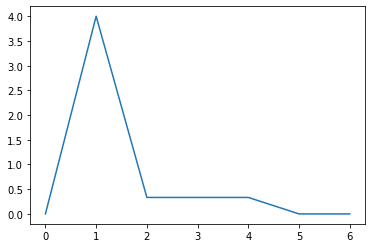

In [11]:
from ipywidgets import interact

@interact(alfa=(-20.0, 20.0), beta=(-20.0, 20.0))
def plot_signal(alfa, beta):
    vec_alfa = alfa * variâncias[0] * Sinal_de_Cluster(list(vetores[:, 0]))
    vec_beta = beta * variâncias[1] * Sinal_de_Cluster(list(vetores[:, 1]))    
    resultante = EJ_média + vec_alfa + vec_beta
    resultante = resultante.para_a_base("C")
    plt.plot(X, resultante.pontos)